<h1> CIFAR 10 </h1>

Author: Vaasudevan Srinivasan <br>
Created on: July 12, 2021

[nbviewer](https://nbviewer.jupyter.org/github/PacktPublishing/Mastering-Keras/blob/master/Module%202.2_%20CNNs.ipynb)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

tf.__version__

'2.5.0'

In [ ]:
# Load and normalize the images
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Make versions of the labels that are one-hot vectors
train_labels_arr = to_categorical(train_labels, 10)
test_labels_arr = to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


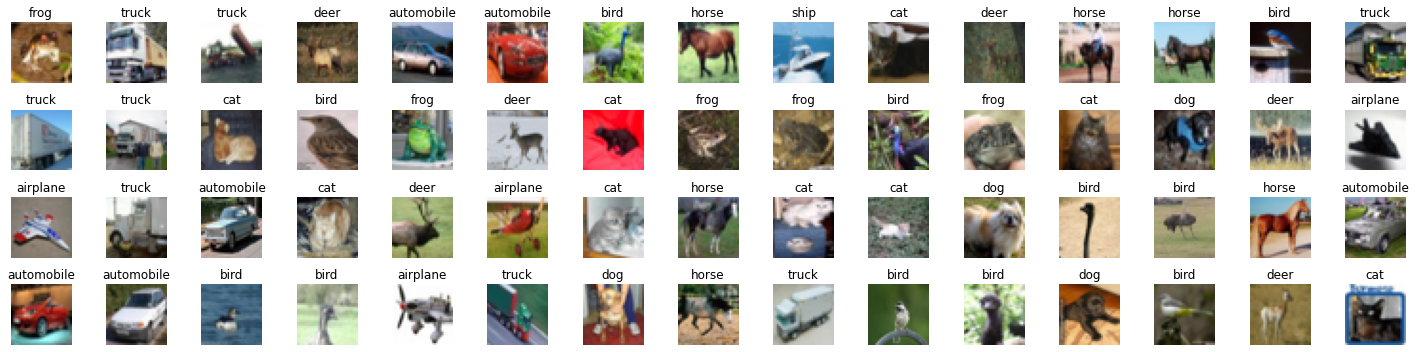

In [ ]:
plt.figure(figsize=(20, 5))
cols, rows = 15, 4
for i in range(cols * rows):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[np.argmax(train_labels_arr[i])])
    plt.axis('off')
plt.tight_layout();

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model.fit(train_images, train_labels_arr,
              validation_split=0.2, epochs=100,
              callbacks=[TqdmCallback(verbose=0), early_stopping],
              verbose=0)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

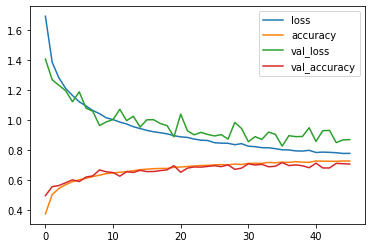

In [ ]:
pd.DataFrame(h.history).plot();

In [ ]:
model.evaluate(test_images, test_labels_arr)

313/313 [==============================] - 1s 3ms/step - loss: 0.8525 - accuracy: 0.7056


[0.8525273203849792, 0.7056000232696533]